### 100,000 UK Used Car Data set
https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes


1. Выбрать набор данных для своей группы: <br>
    3530203_70101: Audi <br>
    3530203_70102: BMW <br>
    3530903_70301: Ford <br>
    3530903_70302: Mercedes<br>
    
2. Разбить данные на тренировочные и тестовые (70% на 30%, random_state=10).
3. Попытаться обучить регрессии c лучшим качеством. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

np.set_printoptions(precision=3)
pd.set_option('precision',3)

sns.set()

from sklearn.model_selection import train_test_split

In [2]:
auto_data = pd.read_csv("bmw.csv")
auto_data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [3]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


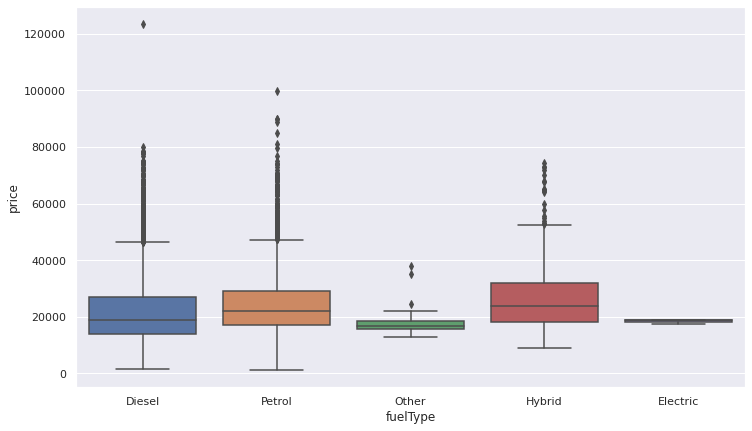

In [4]:
plt.subplots(figsize=(12,7))
sns.boxplot(x=auto_data["fuelType"], y=auto_data["price"])

In [5]:
freq_enc = auto_data["model"].value_counts(normalize=True)
auto_data["model_freq"] = auto_data["model"].map(freq_enc)
auto_data.drop("model", axis=1, inplace=True)
auto_data.head(30)

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,model_freq
0,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,0.098
1,2018,27000,Automatic,14827,Petrol,145,42.8,2.0,0.010
2,2016,16000,Automatic,62794,Diesel,160,51.4,3.0,0.098
3,2017,12750,Automatic,26676,Diesel,145,72.4,1.5,0.183
4,2014,14500,Automatic,39554,Diesel,160,50.4,3.0,0.010
5,2016,14900,Automatic,35309,Diesel,125,60.1,2.0,0.098
6,2017,16000,Automatic,38538,Diesel,125,60.1,2.0,0.098
7,2018,16250,Manual,10401,Petrol,145,52.3,1.5,0.114
8,2017,14250,Manual,42668,Diesel,30,62.8,2.0,0.092
9,2016,14250,Automatic,36099,Diesel,20,68.9,2.0,0.098


In [6]:
freq_enc1 = auto_data["transmission"].value_counts(normalize=True)
auto_data["trans_freq"] = auto_data["transmission"].map(freq_enc1)
auto_data.drop("transmission", axis=1, inplace=True)
freq_enc2 = auto_data["fuelType"].value_counts(normalize=True)
auto_data["fuelType_freq"] = auto_data["fuelType"].map(freq_enc2)
auto_data.drop("fuelType", axis=1, inplace=True)
auto_data.head()

,year,price,mileage,tax,mpg,engineSize,model_freq,trans_freq,fuelType_freq
0,2014,11200,67068,125,57.6,2.0,0.098,0.333,0.652
1,2018,27000,14827,145,42.8,2.0,0.010,0.333,0.317
2,2016,16000,62794,160,51.4,3.0,0.098,0.333,0.652
3,2017,12750,26676,145,72.4,1.5,0.183,0.333,0.652
4,2014,14500,39554,160,50.4,3.0,0.010,0.333,0.652


In [7]:
auto_data.describe()

,year,price,mileage,tax,mpg,engineSize,model_freq,trans_freq,fuelType_freq
count,10781.000,10781.000,10781.000,10781.000,10781.000,10781.000,1.078e+04,10781.000,1.078e+04
mean,2017.079,22733.409,25496.987,131.702,56.399,2.168,1.275e-01,0.353,5.261e-01
std,2.349,11415.528,25143.193,61.511,31.337,0.552,7.313e-02,0.079,1.789e-01
min,1996.000,1200.000,1.000,0.000,5.500,0.000,6.493e-04,0.234,2.783e-04
25%,2016.000,14950.000,5529.000,135.000,45.600,2.000,7.458e-02,0.333,3.169e-01
50%,2017.000,20462.000,18347.000,145.000,53.300,2.000,1.140e-01,0.333,6.518e-01
75%,2019.000,27940.000,38206.000,145.000,62.800,2.000,1.826e-01,0.433,6.518e-01
max,2020.000,123456.000,214000.000,580.000,470.800,6.600,2.266e-01,0.433,6.518e-01


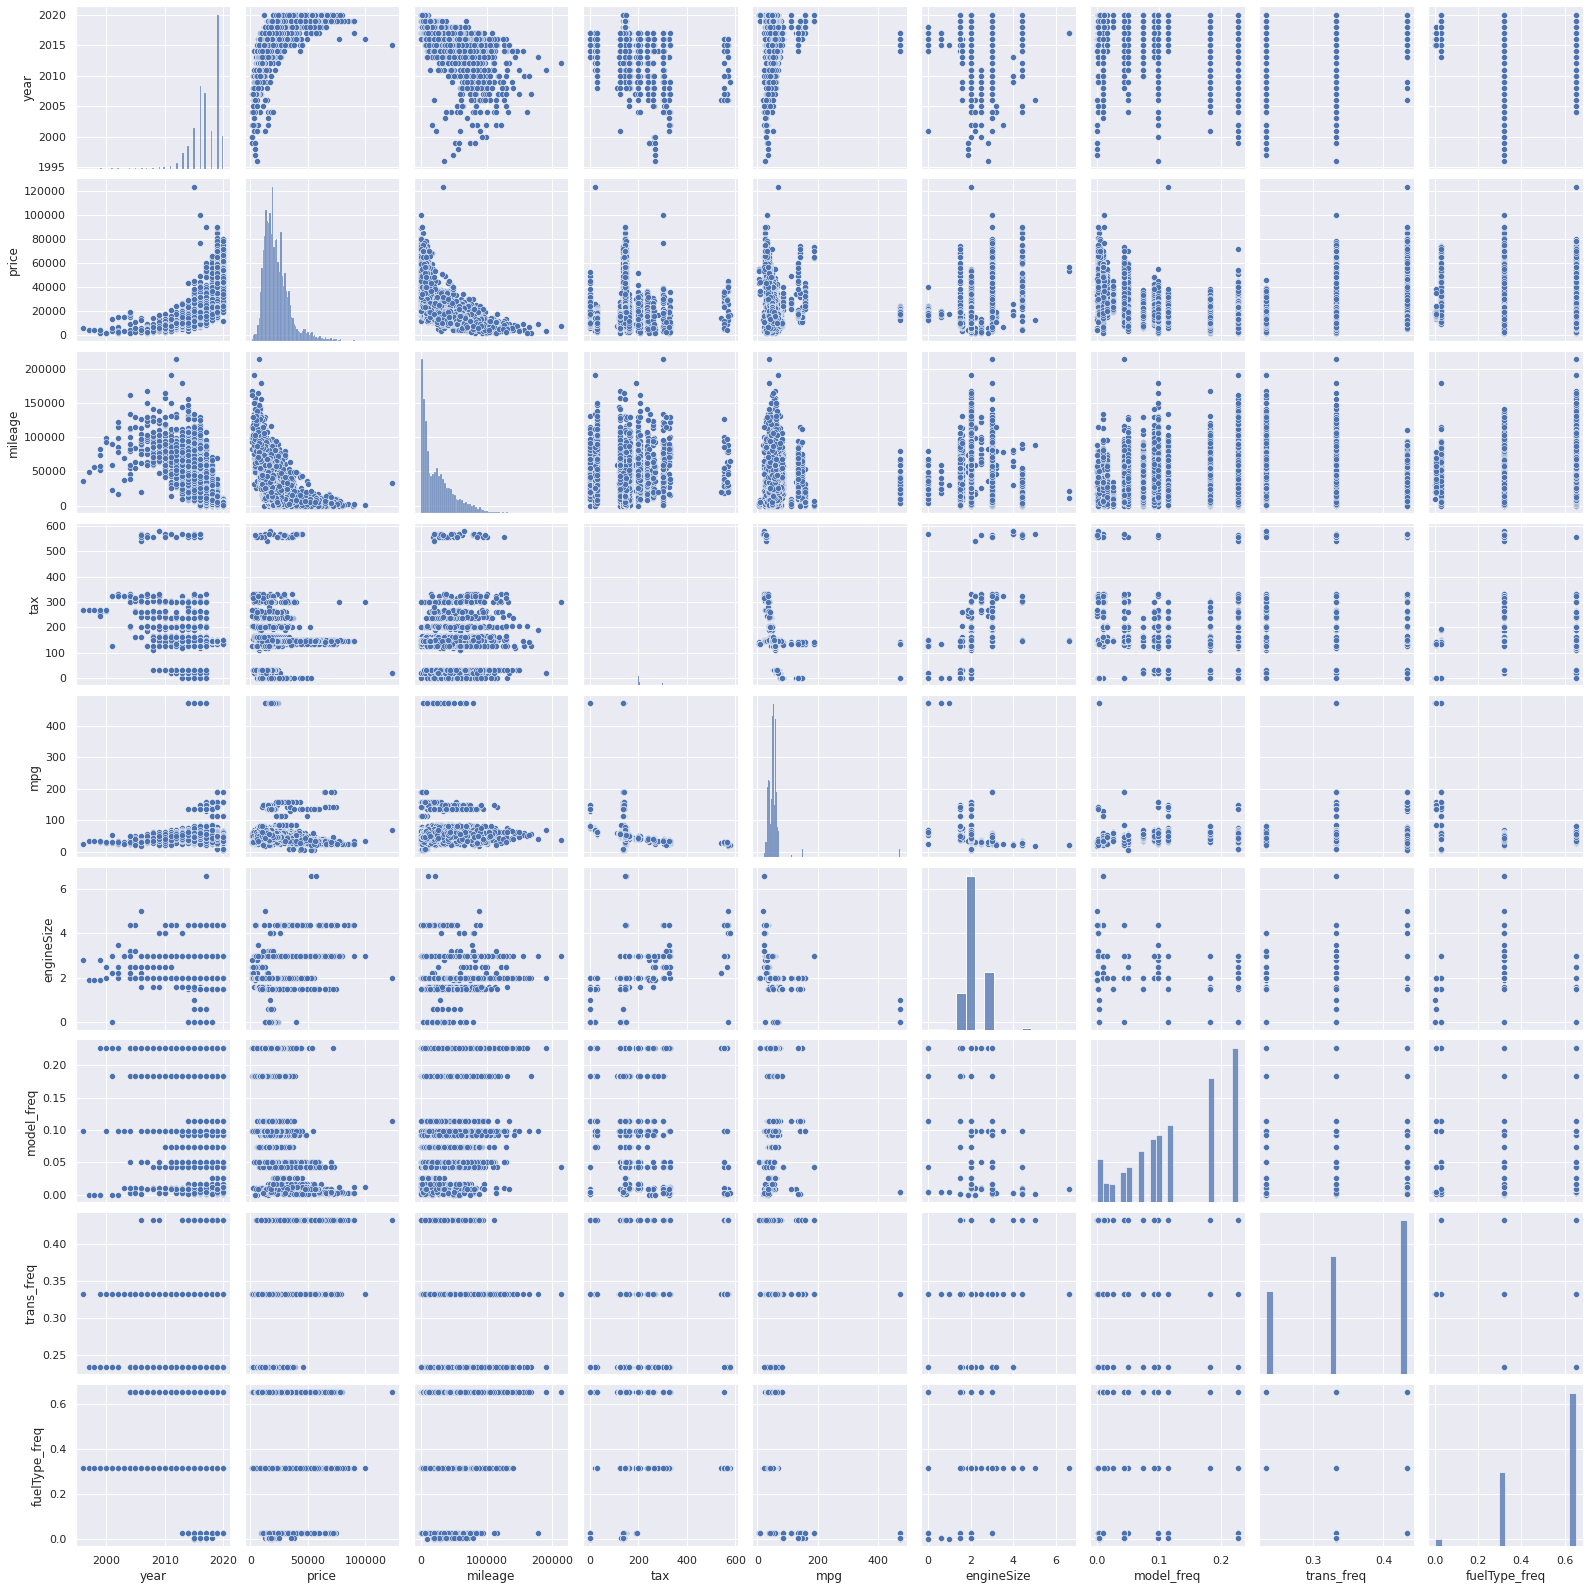

In [8]:
sns.pairplot(auto_data)

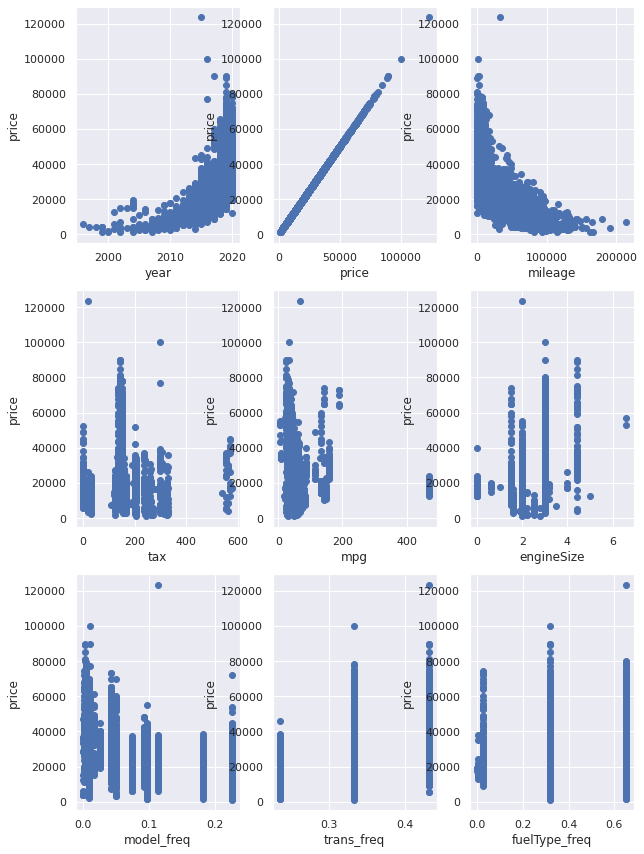

In [9]:
plt.figure(figsize=(10,20))
for i, col in enumerate(auto_data.columns):
    plt.subplot(4,3, i+1)
    plt.scatter(x=auto_data[col], y=auto_data["price"])
    plt.xlabel(col)
    plt.ylabel("price")

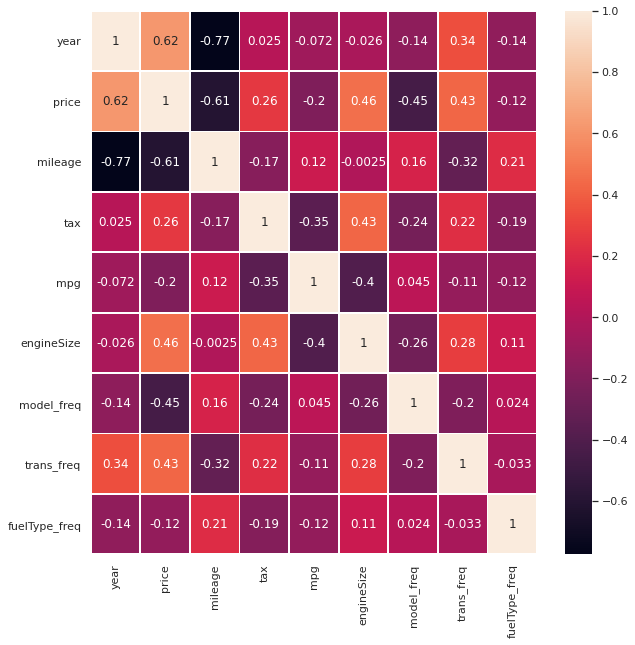

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(auto_data.corr(), annot=True, linewidths=0.7, ax=ax)

In [11]:
X, Y = auto_data.drop(['price'], axis=1), auto_data['price']

In [12]:
import sklearn.metrics as metrics

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)
X_train.head()

,year,mileage,tax,mpg,engineSize,model_freq,trans_freq,fuelType_freq
1934,2015,56262,30,62.8,2.0,0.227,0.433,0.652
1633,2018,11500,150,40.9,3.0,0.010,0.433,0.652
5392,2019,2361,145,41.5,1.5,0.183,0.234,0.317
2480,2019,17794,145,48.7,2.0,0.227,0.433,0.652
6215,2018,8725,145,33.6,3.0,0.012,0.433,0.317


In [14]:
std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

In [15]:
simple_LR = LinearRegression()

simple_LR.fit(X_train_scaled, Y_train)

LinearRegression()

In [16]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

In [17]:
simple_LR_prediction = simple_LR.predict(X_test_scaled)
simple_LR_mse = metrics.mean_squared_error(Y_test, simple_LR_prediction)

print(f'MSE = {round(simple_LR_mse,3)}')

MSE = 36101559.304


In [18]:
simple_LR_rmse = metrics.mean_squared_error(Y_test, simple_LR_prediction, squared=False)
print(f'RMSE = {round(simple_LR_rmse,3)}')

RMSE = 6008.457


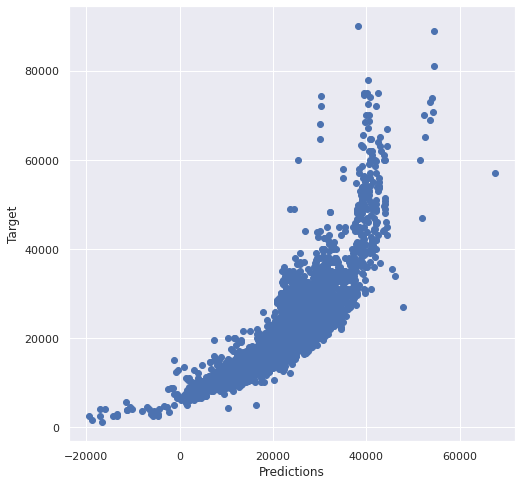

In [19]:
plt.figure(figsize=(8,8))
plt.scatter(simple_LR_prediction, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

In [20]:
simple_LR.intercept_, simple_LR.coef_

(22769.704081632564,
 array([ 4512.733, -2647.607,  -506.757,   142.796,  4783.02 , -2827.973,
          686.494,  -666.917]))

In [29]:
pd.DataFrame(simple_LR.coef_, auto_data.columns[1:], columns=['Coefficients'])

,Coefficients
price,4512.733
mileage,-2647.607
tax,-506.757
mpg,142.796
engineSize,4783.020
model_freq,-2827.973
trans_freq,686.494
fuelType_freq,-666.917


In [22]:
model = Lasso()

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(model.coef_, auto_data.columns[1:], columns= ['Coefficients'])

RMSE = 6008.545


,Coefficients
price,4513.450
mileage,-2646.138
tax,-504.421
mpg,141.665
engineSize,4780.858
model_freq,-2827.188
trans_freq,685.928
fuelType_freq,-665.637


In [23]:
model = LassoCV(random_state=18)

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(model.coef_, auto_data.columns[1:], columns= ['Coefficients'])

RMSE = 6009.025


,Coefficients
price,4513.446
mileage,-2640.231
tax,-490.568
mpg,134.444
engineSize,4767.169
model_freq,-2822.436
trans_freq,683.078
fuelType_freq,-657.727


In [24]:
model = Ridge()

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(model.coef_, auto_data.columns[1:], columns= ['Coefficients'])

RMSE = 6008.458


,Coefficients
price,4511.881
mileage,-2647.777
tax,-506.361
mpg,142.524
engineSize,4782.027
model_freq,-2827.767
trans_freq,686.858
fuelType_freq,-666.756


In [25]:
model = RidgeCV()

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(model.coef_, auto_data.columns[1:], columns= ['Coefficients'])

RMSE = 6008.471


,Coefficients
price,4504.246
mileage,-2649.280
tax,-502.799
mpg,140.084
engineSize,4773.107
model_freq,-2825.914
trans_freq,690.129
fuelType_freq,-665.312


In [26]:
alphas = np.linspace(1, 10, 20)
alphas

array([ 1.   ,  1.474,  1.947,  2.421,  2.895,  3.368,  3.842,  4.316,
        4.789,  5.263,  5.737,  6.211,  6.684,  7.158,  7.632,  8.105,
        8.579,  9.053,  9.526, 10.   ])

In [27]:
model = LassoCV(random_state=18, alphas=alphas)

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(model.coef_, auto_data.columns[1:], columns= ['Coefficients'])

RMSE = 6008.545


,Coefficients
price,4513.450
mileage,-2646.138
tax,-504.421
mpg,141.665
engineSize,4780.858
model_freq,-2827.188
trans_freq,685.928
fuelType_freq,-665.637
